In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Missing value imputation

In [4]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-4-84a8ef96bb78>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-4-84a8ef96bb78>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

For Boxplotting

In [15]:
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

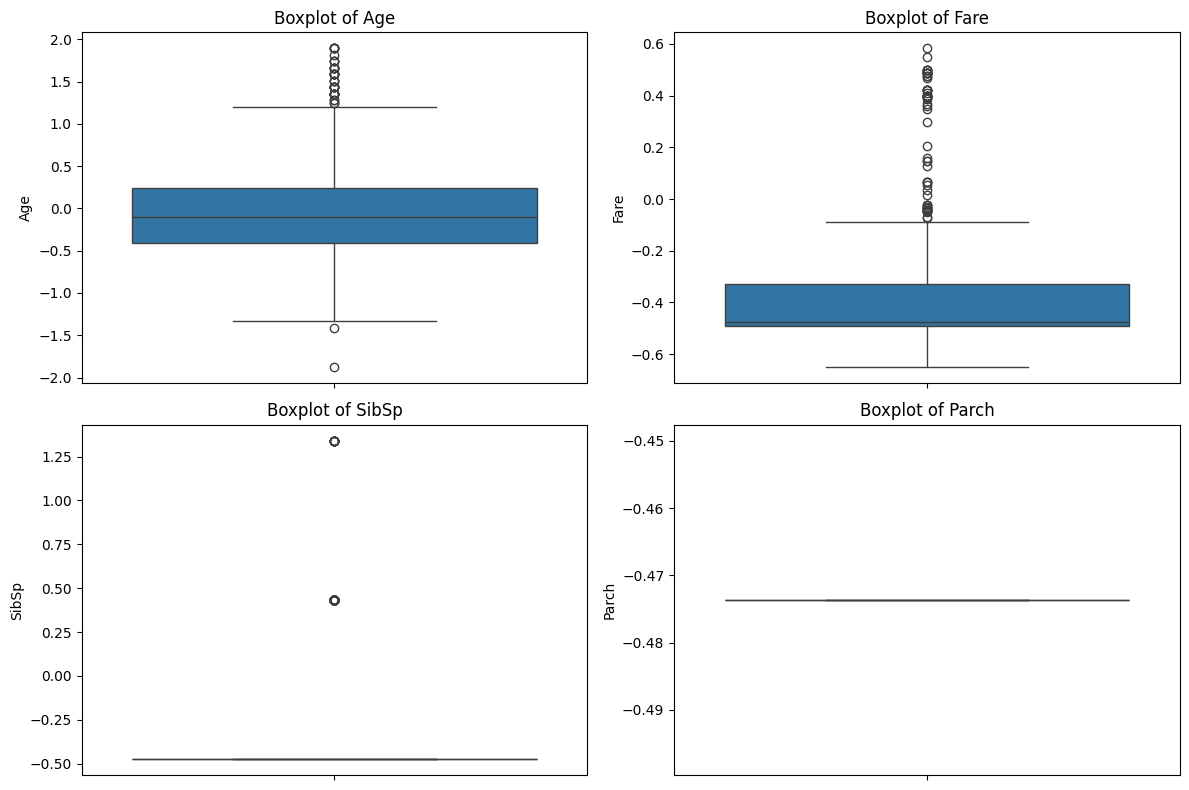

In [16]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

In [17]:
plt.show()

Dropping Cabin

In [5]:
df.drop(columns=['Cabin'], inplace=True)

Encoding categorical features

In [6]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [7]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

Dropping Name and Ticket (not useful)

In [8]:
df.drop(columns=['Name', 'Ticket'], inplace=True)

Standardisation

In [9]:
scaler = StandardScaler()
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[num_cols] = scaler.fit_transform(df[num_cols])

Removing outliers (IQR method)

In [10]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

In [11]:
for col in num_cols:
    df = remove_outliers(df, col)

In [13]:
print(df.shape)
df

(577, 10)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,-0.565736,0.432793,-0.473674,-0.502445,False,True
2,3,1,3,0,-0.258337,-0.474545,-0.473674,-0.488854,False,True
3,4,1,1,0,0.433312,0.432793,-0.473674,0.420730,False,True
4,5,0,3,1,0.433312,-0.474545,-0.473674,-0.486337,False,True
5,6,0,3,1,-0.104637,-0.474545,-0.473674,-0.478116,True,False
...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,1,-0.335187,-0.474545,-0.473674,-0.506472,False,True
886,887,0,2,1,-0.181487,-0.474545,-0.473674,-0.386671,False,True
887,888,1,1,0,-0.796286,-0.474545,-0.473674,-0.044381,False,True
889,890,1,1,1,-0.258337,-0.474545,-0.473674,-0.044381,False,False
